# Q-19 WAP to implement AdaBoost for face recognition.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
data=datasets.load_iris()
x=data.data
y=data.target

In [3]:
data=pd.DataFrame(x,columns=data.feature_names)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.duplicated().sum()

1

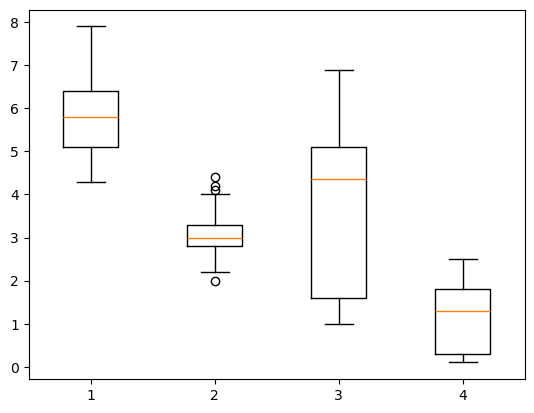

In [7]:
plt.boxplot(data)
plt.show()

In [8]:
data['sepal width (cm)'].clip(data['sepal width (cm)'].quantile(0.2),data['sepal width (cm)'].quantile(0.8),inplace=True)

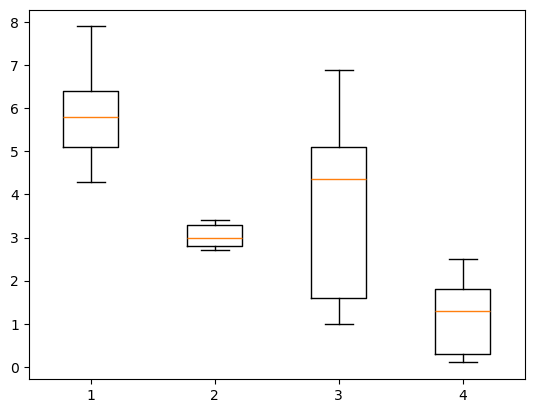

In [9]:
plt.boxplot(data)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
dx=MinMaxScaler()
dx1=dx.fit_transform(data)
data=pd.DataFrame(dx1,columns=data.columns)

In [12]:
from sklearn.feature_selection import mutual_info_classif

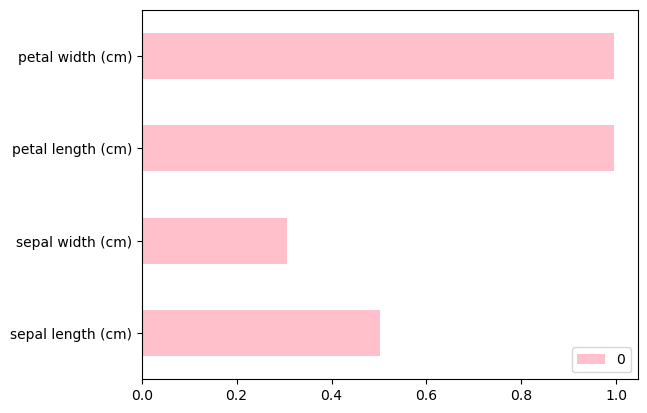

In [13]:
dx2=mutual_info_classif(data,y)
dx3=pd.DataFrame(dx2,data.columns)
dx3.plot(kind='barh',color='pink')
plt.show()

In [14]:
from sklearn.feature_selection import SelectKBest,chi2

In [15]:
dx3=SelectKBest(chi2,k=2)
dx3.fit(data,y)
col=dx3.get_support(indices=True)
get=data.columns[col]
get

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [16]:
data=data.drop(['sepal width (cm)'],axis=1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.2,random_state=100)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
das=DecisionTreeClassifier()
das.fit(xtrain,ytrain)
ypred=das.predict(xtest)
accuracy_score(ytest,ypred)

0.9666666666666667

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn import tree

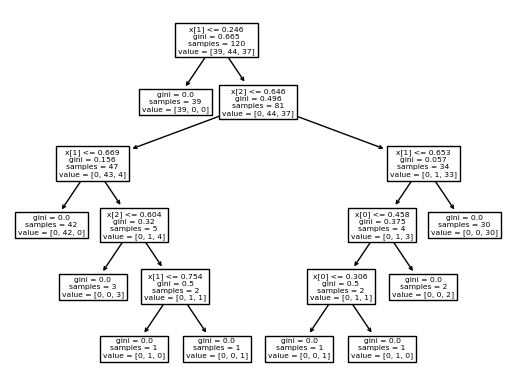

In [23]:
tree.plot_tree(das)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = [{'criterion':["gini","entropy","log_loss"],"max_depth":[1,2,3,4,5,6,7,8,9],"min_samples_split":[2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[2,3,4,5]}]
GSCV = GridSearchCV(das,params,cv=2)
GSCV.fit(xtrain,ytrain)
GSCV.best_params_
accuracy_score(GSCV.predict(xtest),ytest)

0.9666666666666667

In [26]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
dx = AdaBoostClassifier(n_estimators=100, learning_rate=5, base_estimator=RandomForestClassifier())
dx.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=5,
                   n_estimators=100)

In [28]:
ypreda=dx.predict(xtest)

In [29]:
accuracy_score(ypreda,ytest)

0.9666666666666667